#**BA305 - Final Project - AirBnB London Dataset**

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

## **Importing the Data**

In [ ]:
drive.mount('/content/drive')

weekdays_data = pd.read_csv('/content/drive/MyDrive/london_weekdays.csv') #'/content/drive/My Drive/Junior Year/Spring 2024/BA305/london_weekdays.csv'
weekends_data = pd.read_csv('/content/drive/MyDrive/london_weekends.csv') #'/content/drive/My Drive/Junior Year/Spring 2024/BA305/london_weekdends.csv'

weekdays_data['is_weekend'] = 0
weekends_data['is_weekend'] = 1

# merging the two files with the dummy for is_weekend
combined_data = pd.concat([weekdays_data, weekends_data])

combined_data

Mounted at /content/drive


,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,...,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat,is_weekend
0,0,570.098074,Entire home/apt,False,False,2.0,False,0,0,10.0,...,1,5.301018,1.588990,209.632578,14.571793,467.597522,8.372724,-0.16032,51.46531,0
1,1,297.984430,Private room,False,True,2.0,True,1,0,10.0,...,1,2.198946,0.379262,553.891744,38.501630,961.472137,17.215961,-0.09683,51.50343,0
2,2,336.790611,Private room,False,True,2.0,False,1,0,10.0,...,1,2.322958,0.453178,428.287849,29.770764,959.042839,17.172462,-0.10554,51.52407,0
3,3,226.722171,Private room,False,True,2.0,True,1,0,10.0,...,1,5.707825,1.723977,195.694744,13.602959,452.232472,8.097600,-0.16575,51.46292,0
4,4,256.355982,Private room,False,True,3.0,False,0,0,9.0,...,1,3.257945,0.825417,329.477068,22.902317,735.327280,13.166649,-0.12055,51.53728,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,5374,1035.066676,Private room,False,True,2.0,False,0,1,10.0,...,0,5.155373,0.883829,271.191201,18.851558,528.042180,9.451035,-0.05357,51.51255,1
5375,5375,181.095510,Private room,False,True,2.0,False,1,0,10.0,...,1,5.072177,0.344055,268.165870,18.641255,554.906232,9.931855,-0.05620,51.51823,1
5376,5376,420.517886,Entire home/apt,False,False,2.0,False,0,0,10.0,...,1,6.709982,0.926188,181.892001,12.644022,395.397885,7.076933,-0.22172,51.52180,1
5377,5377,217.314612,Private room,False,True,2.0,False,0,0,10.0,...,1,6.736940,0.353634,184.278328,12.809905,471.029678,8.430610,-0.22286,51.49715,1


## **Cleaning the Data**

In [ ]:
combined_data = combined_data.drop('Unnamed: 0', axis=1)
combined_data = combined_data.drop('attr_index', axis=1)
combined_data = combined_data.drop('rest_index', axis=1)
combined_data = combined_data.drop('room_shared', axis=1)
combined_data = combined_data.drop('room_private', axis=1)
combined_data = combined_data.drop('lng', axis=1)
combined_data = combined_data.drop('lat', axis=1)

In [ ]:
room_type_dummies = pd.get_dummies(combined_data['room_type'], prefix='room_type') # Do i drop one????????
combined_data = pd.concat([combined_data, room_type_dummies], axis=1) #dummy + data
combined_data = combined_data.drop('room_type_Shared room', axis=1)
combined_data = combined_data.drop('room_type', axis=1) #dropping the var we made dummy of

In [ ]:
combined_data

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,is_weekend,room_type_Entire home/apt,room_type_Private room
0,570.098074,2.0,False,0,0,10.0,98.0,1,5.301018,1.588990,14.571793,8.372724,0,True,False
1,297.984430,2.0,True,1,0,10.0,99.0,1,2.198946,0.379262,38.501630,17.215961,0,False,True
2,336.790611,2.0,False,1,0,10.0,96.0,1,2.322958,0.453178,29.770764,17.172462,0,False,True
3,226.722171,2.0,True,1,0,10.0,99.0,1,5.707825,1.723977,13.602959,8.097600,0,False,True
4,256.355982,3.0,False,0,0,9.0,98.0,1,3.257945,0.825417,22.902317,13.166649,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5374,1035.066676,2.0,False,0,1,10.0,100.0,0,5.155373,0.883829,18.851558,9.451035,1,False,True
5375,181.095510,2.0,False,1,0,10.0,100.0,1,5.072177,0.344055,18.641255,9.931855,1,False,True
5376,420.517886,2.0,False,0,0,10.0,98.0,1,6.709982,0.926188,12.644022,7.076933,1,True,False
5377,217.314612,2.0,False,0,0,10.0,94.0,1,6.736940,0.353634,12.809905,8.430610,1,False,True


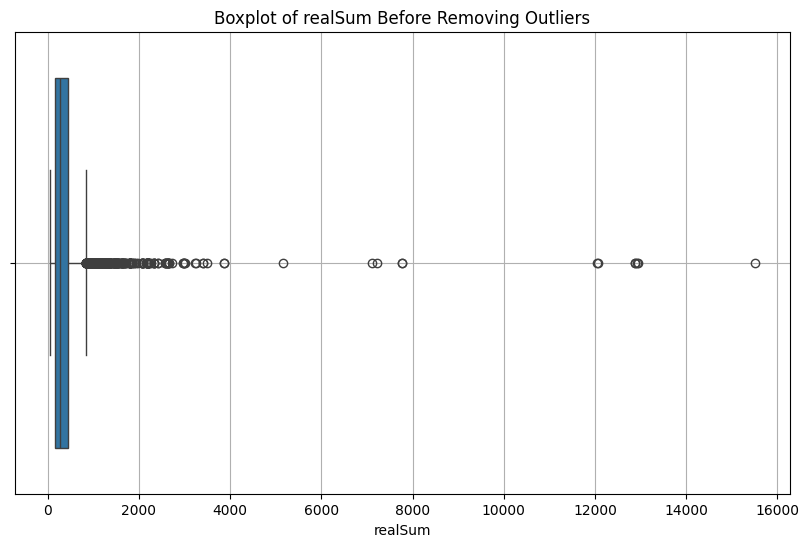

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_data['realSum'])
plt.title('Boxplot of realSum Before Removing Outliers')
plt.xlabel('realSum')
plt.grid(True)
plt.show()

In [ ]:
Q1 = combined_data['realSum'].quantile(0.25)
Q3 = combined_data['realSum'].quantile(0.75)
IQR = Q3 - Q1

# defining bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#create filter without outliers
filtered_data = combined_data[(combined_data['realSum'] >= lower_bound) & (combined_data['realSum'] <= upper_bound)]

print(f"Original Data Count: {combined_data.shape[0]}")
print(f"Data Count After Outlier Removal: {filtered_data.shape[0]}")

Original Data Count: 9993
Data Count After Outlier Removal: 9462


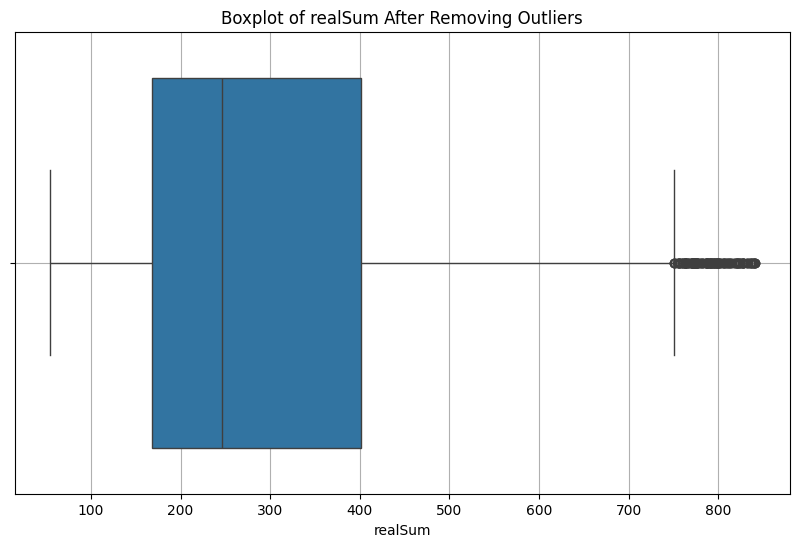

In [ ]:
#boxplot after outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_data['realSum'])
plt.title('Boxplot of realSum After Removing Outliers')
plt.xlabel('realSum')
plt.grid(True)
plt.show()

## **Correlation and Matrix**

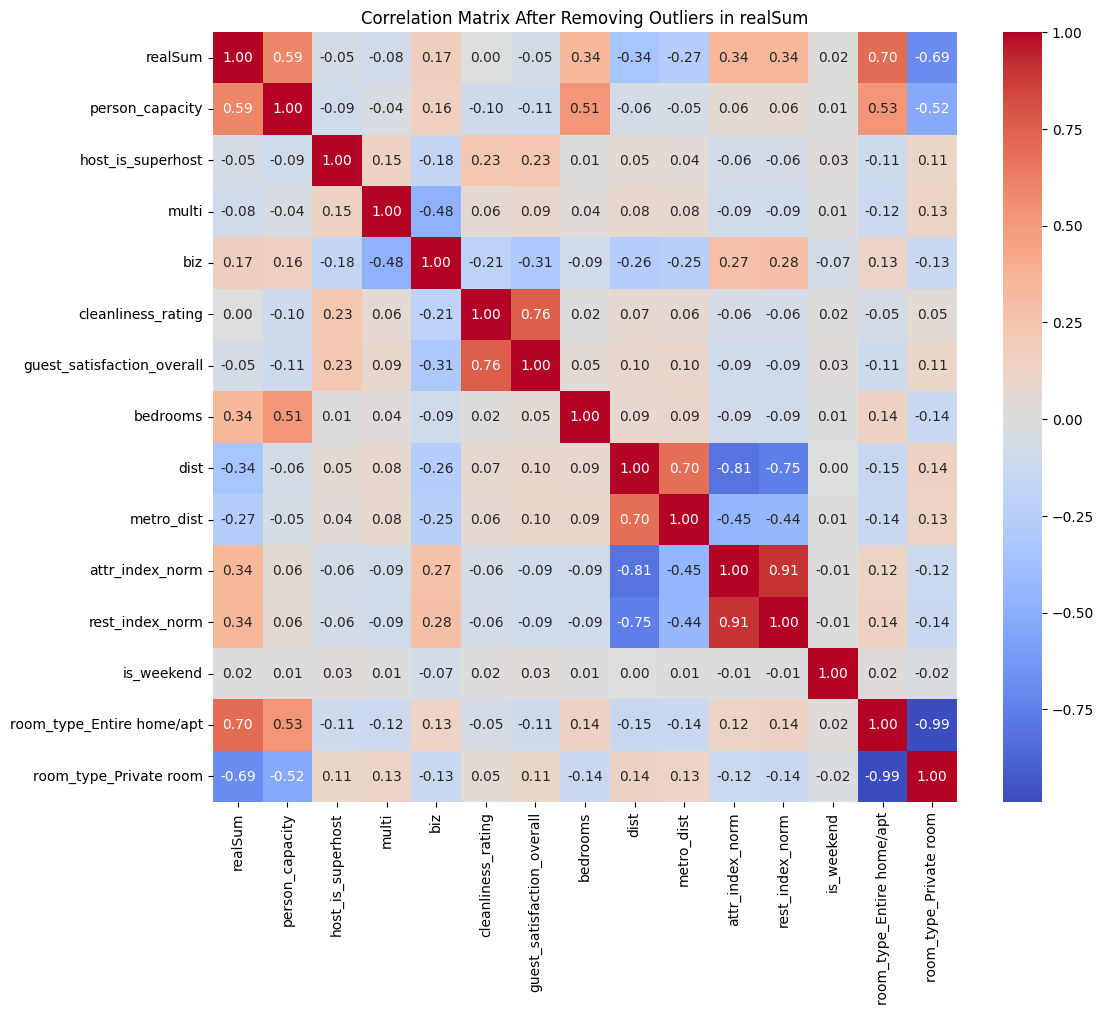

In [ ]:
corr_matrix = filtered_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix After Removing Outliers in realSum')
plt.show()

In [ ]:
#dropped dist because of multcolinnearity
filtered_data = filtered_data.drop('dist', axis = 1)

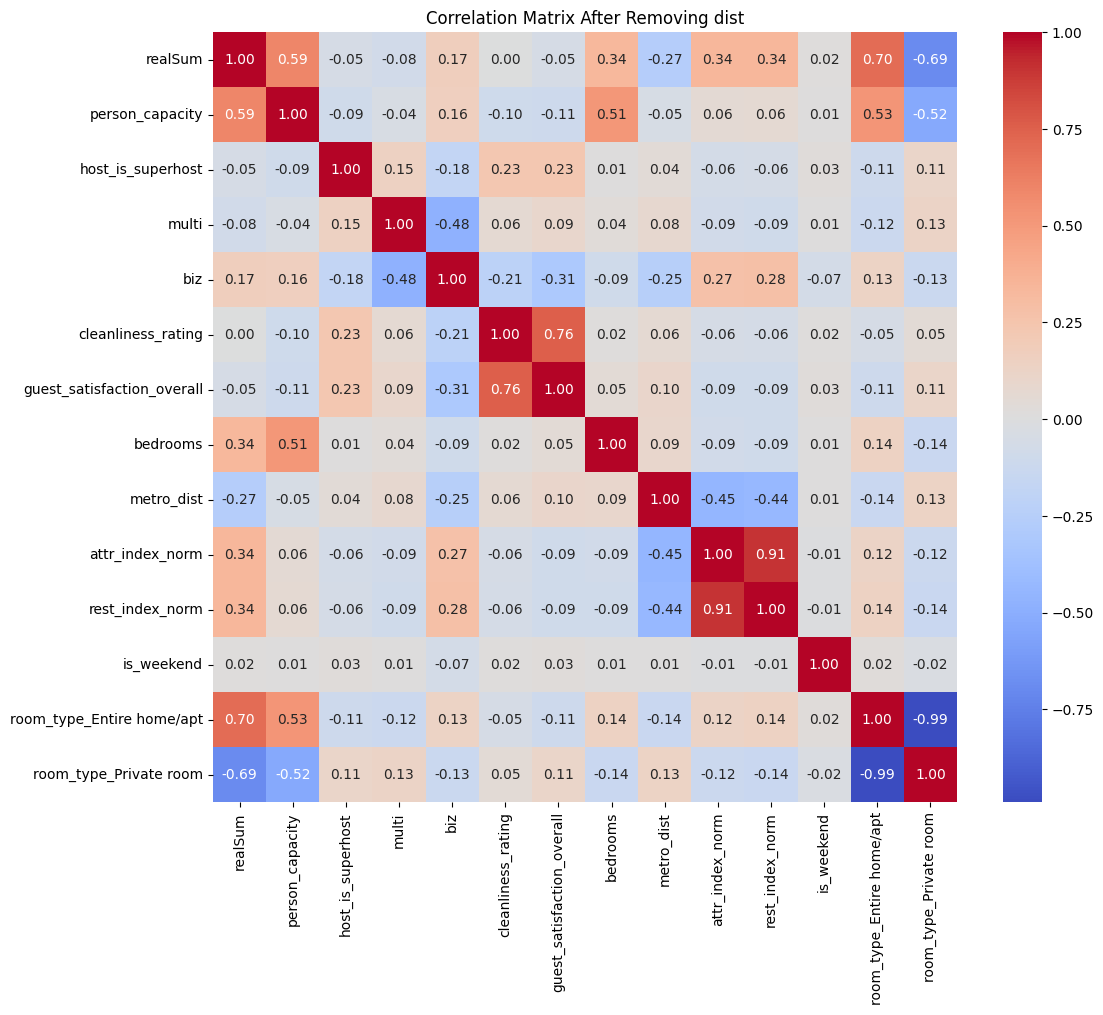

In [ ]:
# plot without dist
corr_matrix_2 = filtered_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_2, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix After Removing dist')
plt.show()


##**Preparing the Data for PCA**

In [ ]:
# making a new dataframe to keep realSum before dropping it
y = filtered_data['realSum']

#dropping real sum from the filtered data
filtered_data = filtered_data.drop('realSum', axis = 1)

In [ ]:
#running PCA on the filtered data
pcs = PCA()

pcs.fit(preprocessing.scale(filtered_data))

pcsSummary_df = pd.DataFrame({
            'Proportion of variance': pcs.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
            })
pcsSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.235,0.235
1,0.168,0.403
2,0.139,0.542
3,0.094,0.636
4,0.082,0.718
5,0.076,0.794
6,0.066,0.860
7,0.052,0.912
8,0.038,0.950
9,0.025,0.974


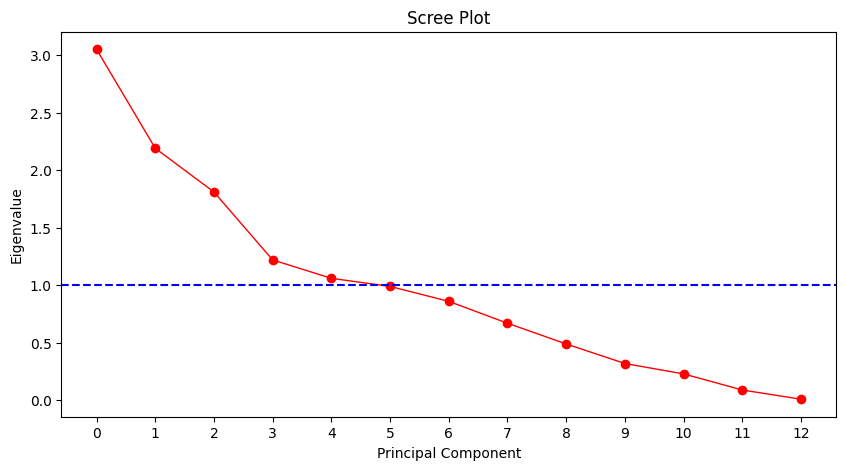

In [ ]:
# scree plot of eigenvalues
xvals = np.arange(filtered_data.shape[1]);
plt.figure(figsize=(10,5))
plt.plot(xvals, pcs.explained_variance_.round(2), 'ro-', linewidth=1)
plt.xticks(xvals)


plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

#add a horizontal line for latent root
plt.axhline(y=1, color='b', linestyle='--')

In [ ]:
pcs = PCA(n_components=5)
principalComponents = pcs.fit_transform(preprocessing.scale(filtered_data))

principalDF = pd.DataFrame(
        data = principalComponents.round(2),
        columns = ['F1','F2','F3','F4', 'F5'])

principalDF

,F1,F2,F3,F4,F5
0,-0.03,-1.22,-0.50,-1.10,-0.82
1,-1.13,1.59,-2.46,1.67,0.54
2,-0.86,1.40,-1.29,1.33,0.48
3,-2.66,0.00,-1.03,0.87,0.21
4,-0.52,0.80,-0.19,-0.14,0.95
...,...,...,...,...,...
9457,0.67,-2.77,0.39,0.06,0.17
9458,-1.68,0.53,-0.90,1.05,-0.38
9459,-0.04,-1.32,-0.60,-0.92,-1.54
9460,-1.36,0.50,-0.10,-0.50,-0.17


In [ ]:
#transposing PCA to original
pd.DataFrame(pcs.components_.transpose(), index=[filtered_data]).round(2)

,0,1,2,3,4
person_capacity,0.30,-0.41,-0.02,0.12,0.34
host_is_superhost,-0.18,-0.03,-0.27,0.09,-0.01
multi,-0.20,-0.09,-0.12,0.69,-0.15
biz,0.32,0.20,0.16,-0.43,0.20
cleanliness_rating,-0.22,-0.11,-0.55,-0.33,0.04
guest_satisfaction_overall,-0.26,-0.12,-0.54,-0.26,0.08
bedrooms,0.06,-0.36,-0.03,0.21,0.67
metro_dist,-0.27,-0.26,0.21,-0.09,0.02
attr_index_norm,0.34,0.36,-0.33,0.19,0.10
rest_index_norm,0.34,0.36,-0.33,0.19,0.09


In [ ]:
eig = pcs.explained_variance_.round(2)
explained_variance_ratio = pcs.explained_variance_ratio_
print(eig)
print(np.sum(explained_variance_ratio))

[3.05 2.19 1.81 1.22 1.06]
0.7181241855753787


##**Splitting the Data**

In [ ]:
X = filtered_data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

##**Naive Rule**

In [ ]:
#mean of the target variable in the training set
naive_mean = np.mean(y_train)

#predictions using mean for both training and test sets
naive_train_pred = np.full_like(y_train, fill_value=naive_mean)
naive_pred = np.full_like(y_test, fill_value=naive_mean)

#RMSE
naive_train_rmse = mean_squared_error(y_train, naive_train_pred, squared=False)
naive_rmse = mean_squared_error(y_test, naive_pred, squared=False)

print("Naive Rule Train RMSE (Predicting Mean):", naive_train_rmse)
print("Naive Rule Test RMSE (Predicting Mean):", naive_rmse)


Naive Rule Train RMSE (Predicting Mean): 169.65516636385257
Naive Rule Test RMSE (Predicting Mean): 169.71537119259716


##**Random Forest**

In [ ]:
# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=42)
rf_regressor.fit(X_train_scaled, y_train)

rf_train_pred = rf_regressor.predict(X_train_scaled)
rf_train_rmse = mean_squared_error(y_train, rf_train_pred, squared = False)


rf_pred = rf_regressor.predict(X_test_scaled)
rf_rmse = mean_squared_error(y_test, rf_pred, squared = False)

print("Random Forest Train RMSE:", rf_train_rmse)
print("Random Forest Test RMSE:", rf_rmse)

Random Forest Train RMSE: 80.37838200657684
Random Forest Test RMSE: 88.40182692765374


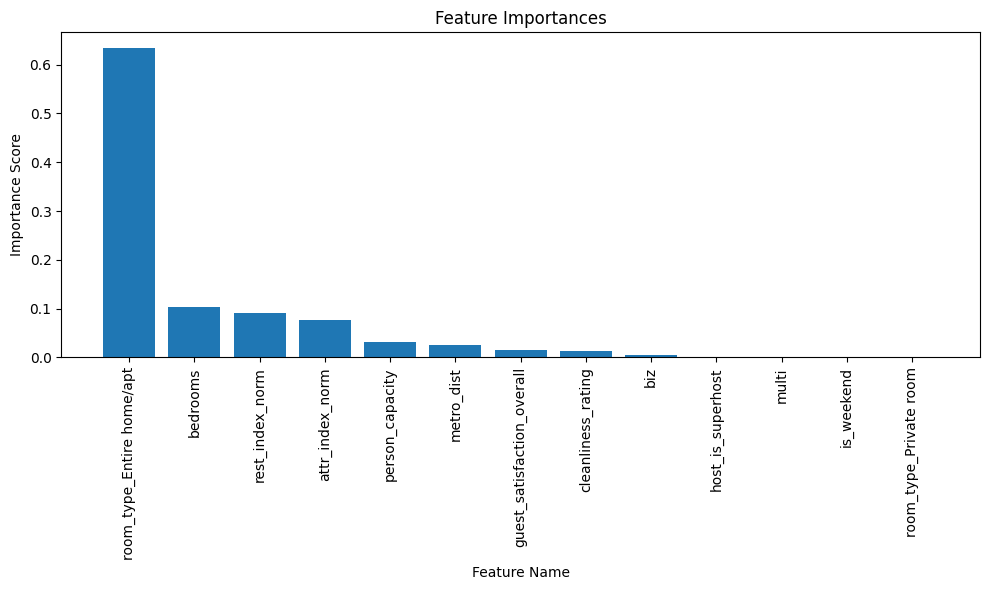

In [ ]:
#feature importance for RF
feature_importances = rf_regressor.feature_importances_

feature_names = X_train.columns

indices = np.argsort(feature_importances)[::-1]

#the feature importances plotting
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

##**KNN**

In [ ]:
# K-Nearest Neighbors Regression
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_regressor.fit(X_train_scaled, y_train)

knn_train_pred = knn_regressor.predict(X_train_scaled)
knn_train_rmse = mean_squared_error(y_train, knn_train_pred, squared = False)


knn_pred = knn_regressor.predict(X_test_scaled)
knn_rmse = mean_squared_error(y_test, knn_pred, squared = False)

print("KNN Train RMSE:", knn_train_rmse)
print("KNN Test RMSE:", knn_rmse)

KNN Train RMSE: 79.63326829434956
KNN Test RMSE: 95.63322917905936


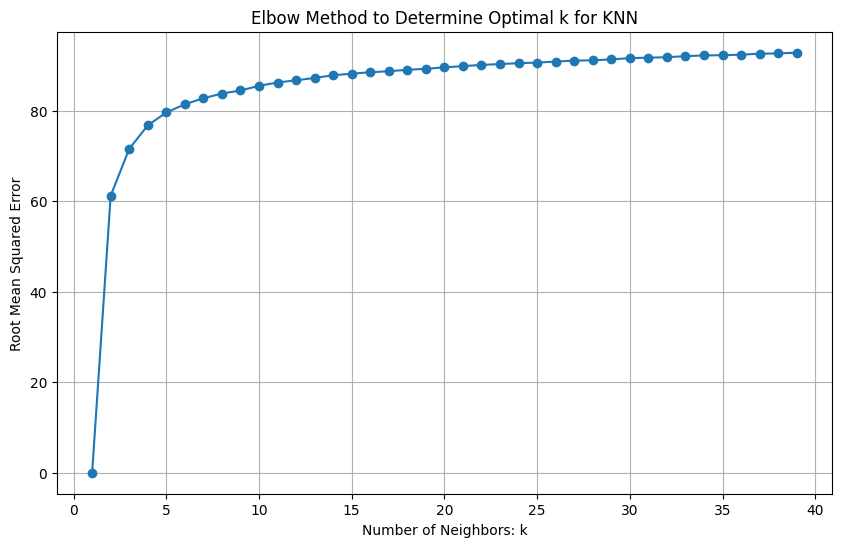

In [ ]:
#Using elbow method to find optimal value of k
rmse_values = []
k_values = range(1, 40, 1)

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_scaled, y_train)
    knn_train_pred = knn_regressor.predict(X_train_scaled)
    knn_train_rmse = mean_squared_error(y_train, knn_train_pred, squared=False)
    rmse_values.append(knn_train_rmse)

plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o')
plt.title('Elbow Method to Determine Optimal k for KNN')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Root Mean Squared Error')
plt.grid(True)
plt.show()


##**Linear Regression**

In [ ]:
# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

linear_train_pred = linear_regressor.predict(X_train_scaled)
linear_train_rmse = mean_squared_error(y_train, linear_train_pred, squared = False)


linear_pred = linear_regressor.predict(X_test_scaled)
linear_rmse = mean_squared_error(y_test, linear_pred, squared = False)

print("Linear Regression Train RMSE:", linear_train_rmse)
print("Linear Regression Test RMSE:", linear_rmse)

Linear Regression Train RMSE: 97.83138649157995
Linear Regression Test RMSE: 99.24230165218675


##**XG Boost**

In [ ]:
# XGBoost Regression
xgb_regressor = XGBRegressor(learning_rate=0.05, n_estimators=100, random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)

xgb_train_pred = xgb_regressor.predict(X_train_scaled)
xgb_train_rmse = mean_squared_error(y_train, xgb_train_pred, squared = False)


xgb_pred = xgb_regressor.predict(X_test_scaled)
xgb_rmse = mean_squared_error(y_test, xgb_pred, squared = False)


print("XGBoost Regression Train RMSE:", xgb_train_rmse)
print("XGBoost Regression Test RMSE:", xgb_rmse)

XGBoost Regression Train RMSE: 71.96188698757678
XGBoost Regression Test RMSE: 84.27547329939559


<Figure size 1000x600 with 0 Axes>

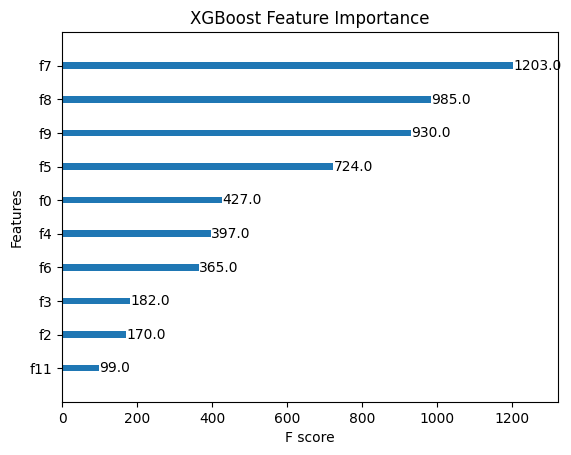

In [ ]:
#feature importance for XG Boost
feature_importance = xgb_regressor.feature_importances_


plt.figure(figsize=(10, 6))
plot_importance(xgb_regressor, importance_type='weight', max_num_features=10)
plt.title('XGBoost Feature Importance')
plt.grid(False)
plt.show()

##**Comparing our Models**

In [ ]:
# Dictionary to store RMSE values of each model
# Print RMSE for each model
print("Naive Rule RMSE", naive_rmse)
print("Random Forest RMSE:", rf_rmse)
print("KNN RMSE:", knn_rmse)
print("Linear Regression RMSE:", linear_rmse)
print("XGBoost RMSE:", xgb_rmse)


Naive Rule RMSE 169.71537119259716
Random Forest RMSE: 88.40182692765374
KNN RMSE: 95.63322917905936
Linear Regression RMSE: 99.24230165218675
XGBoost RMSE: 84.27547329939559


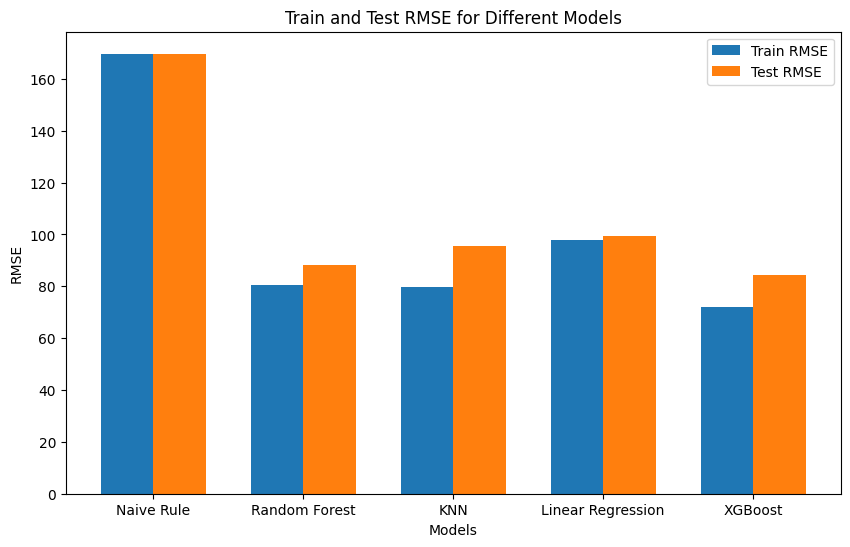

In [ ]:
# list of models
models = ['Naive Rule', 'Random Forest', 'KNN', 'Linear Regression', 'XGBoost']

train_rmse_values = [naive_train_rmse, rf_train_rmse, knn_train_rmse, linear_train_rmse, xgb_train_rmse]

test_rmse_values = [naive_rmse, rf_rmse, knn_rmse, linear_rmse, xgb_rmse]

plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(models))

plt.bar(index, train_rmse_values, bar_width, label='Train RMSE')
plt.bar([i + bar_width for i in index], test_rmse_values, bar_width, label='Test RMSE')

plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Train and Test RMSE for Different Models')
plt.xticks([i + bar_width / 2 for i in index], models)
plt.legend()

plt.show()


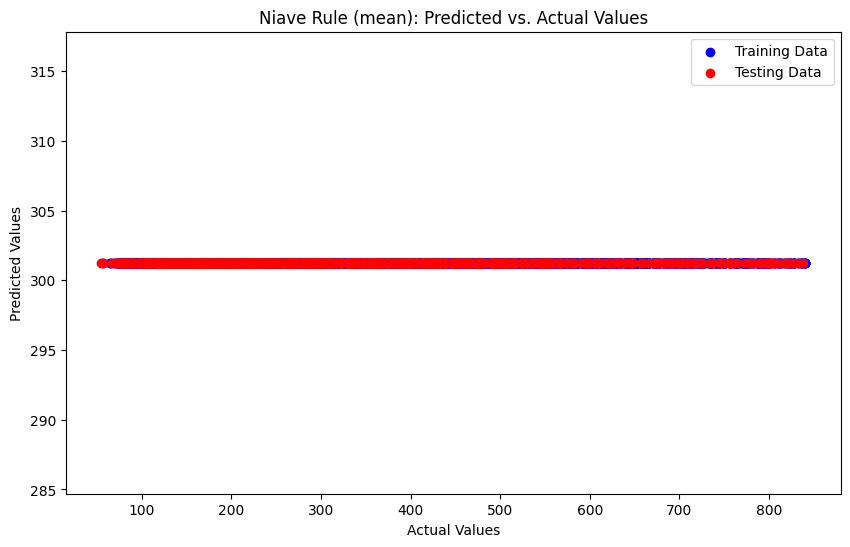

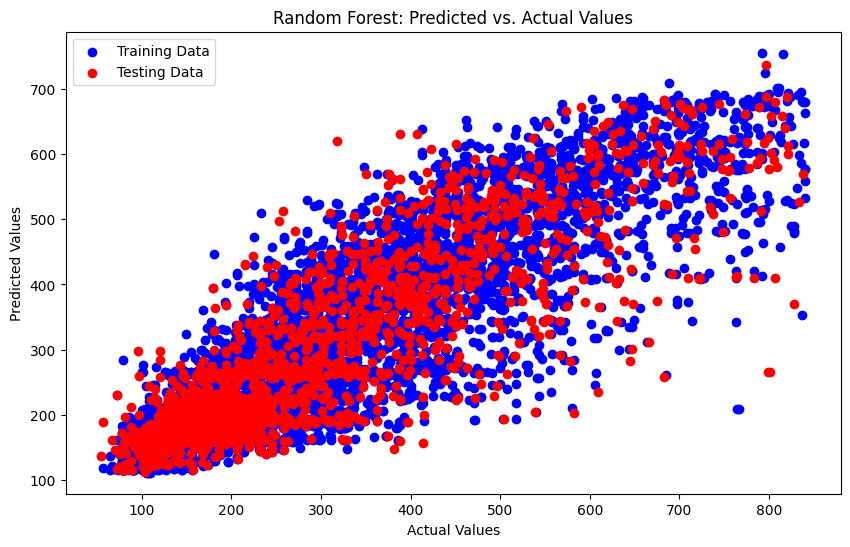

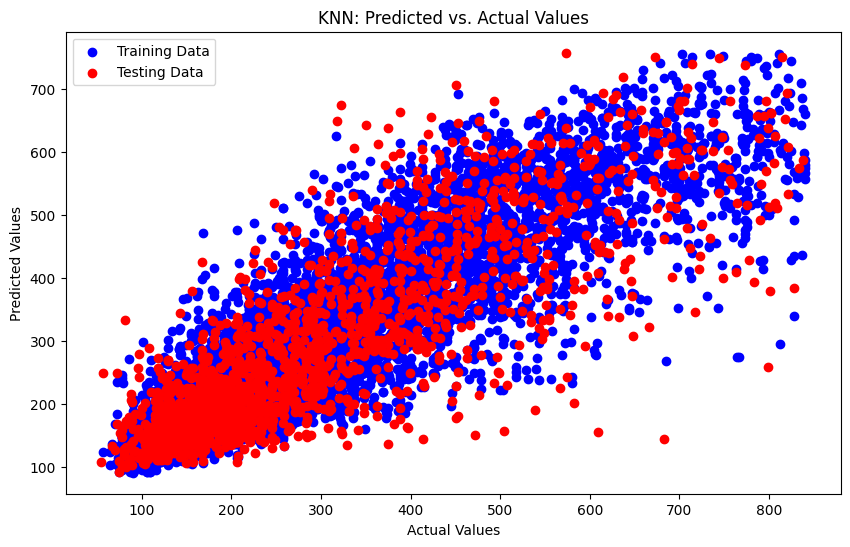

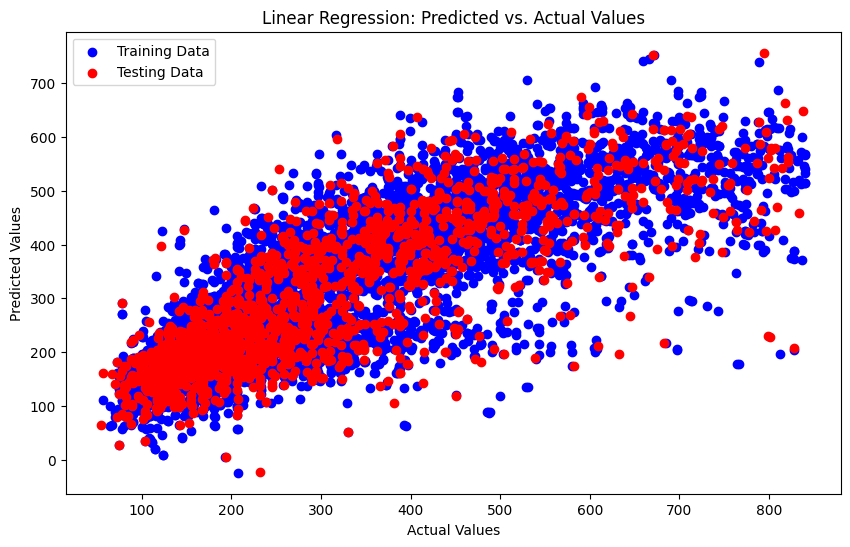

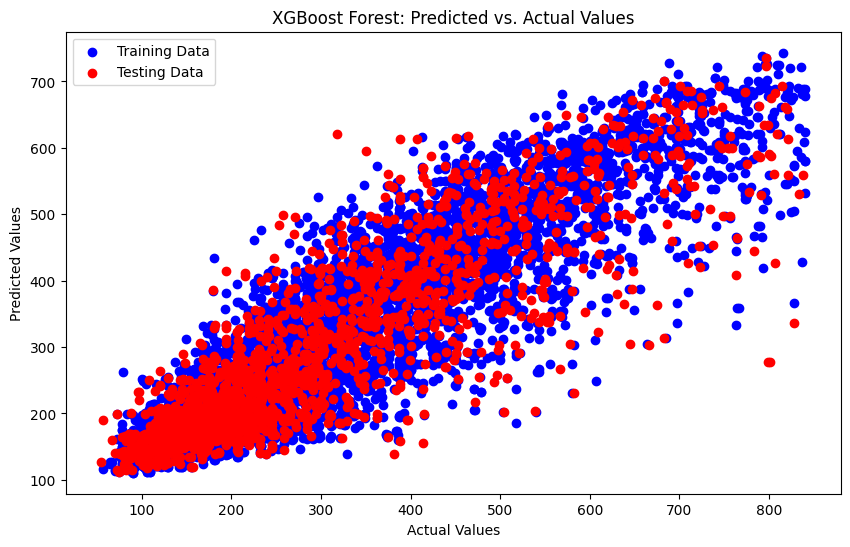

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train, naive_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, naive_pred, color='red', label='Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Niave Rule (mean): Predicted vs. Actual Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_train, rf_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, rf_pred, color='red', label='Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Predicted vs. Actual Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_train, knn_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, knn_pred, color='red', label='Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN: Predicted vs. Actual Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_train, linear_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, linear_pred, color='red', label='Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Predicted vs. Actual Values')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_train, xgb_train_pred, color='blue', label='Training Data')
plt.scatter(y_test, xgb_pred, color='red', label='Testing Data')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Forest: Predicted vs. Actual Values')
plt.legend()
plt.show()



##**Predictive Model (using XG Boost due to lowest RMSE and well fitted)**

In [ ]:
# function to predict price based on user inputs
def predict_prices(xgb_regressor):
    # get user inputs for each feature
    person_capacity = int(input("Enter person capacity: "))
    host_is_superhost = int(input("Is host superhost? (1 for Yes, 0 for No): "))
    multi = int(input("Enter multi value: "))
    biz = int(input("Enter biz value: "))
    cleanliness_rating = float(input("Enter cleanliness rating: "))
    guest_satisfaction_overall = int(input("Enter guest satisfaction overall rating: "))
    bedrooms = int(input("Enter number of bedrooms: "))
    metro_dist = float(input("Enter metro distance: "))
    attr_index_norm = float(input("Enter attraction index: "))
    rest_index_norm = float(input("Enter restaurant index: "))
    is_weekend = int(input("Is it a weekend? (1 for Yes, 0 for No): "))
    room_type_Entire_home = int(input("Is room type entire home? (1 for Yes, 0 for No): "))
    room_type_Private_room = int(input("Is room type private room? (1 for Yes, 0 for No): "))

    # create the inputs list
    inputs = [[person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms,
               metro_dist, attr_index_norm, rest_index_norm, is_weekend, room_type_Entire_home, room_type_Private_room]]

    # perform the prediction
    predicted_price = xgb_regressor.predict(inputs)[0]

    return predicted_price

# call function
predicted_price = predict_prices(xgb_regressor)
print("Predicted Price: $", predicted_price)

Enter person capacity: 2
Is host superhost? (1 for Yes, 0 for No): 1
Enter multi value: 1
Enter biz value: 0
Enter cleanliness rating: 10
Enter guest satisfaction overall rating: 98
Enter number of bedrooms: 1
Enter metro distance: 0.1
Enter attraction index: 90
Enter restaurant index: 90
Is it a weekend? (1 for Yes, 0 for No): 0
Is room type entire home? (1 for Yes, 0 for No): 1
Is room type private room? (1 for Yes, 0 for No): 0
Predicted Price: $ 419.0226
